In [1]:
import webdataset as wds 
import numpy as np
from huggingface_hub import hf_hub_download
from hoho import proc
from tqdm import tqdm
import sys
sys.path.append('..')
from handcrafted_solution import *


# Loading part of training data

For simplicity we are showing example only on a once shard of data

In [2]:
# One shard of the dataset
dataset = wds.WebDataset(hf_hub_download(repo_id='usm3d/usm-training-data',
            filename='data/train/hoho_v3_000-of-032.tar.gz',
            repo_type="dataset"))
dataset = dataset.decode()
dataset = dataset.map(proc)

for entry in dataset:
    human_entry = convert_entry_to_human_readable(entry)
    print (entry.keys())
    break
    

dict_keys(['__key__', '__url__', 'ade20k', 'depthcm', 'gestalt', 'wf_vertices', 'wf_edges', 'edge_semantics', 'mesh_vertices', 'mesh_faces', 'face_semantics', 'K', 'R', 't', 'images', 'points3d', 'cameras'])


In [3]:
human_entry['points3d'][1781]

Point3D(id=1781, xyz=array([ 473.37884828, -241.57801038,  361.3271347 ]), rgb=array([123, 142, 143]), error=array(1.10828705), image_ids=array([6, 7]), point2D_idxs=array([7917, 3222]))

# Visualizing inputs

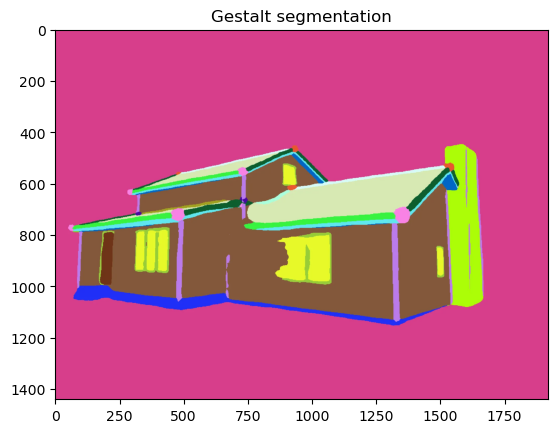

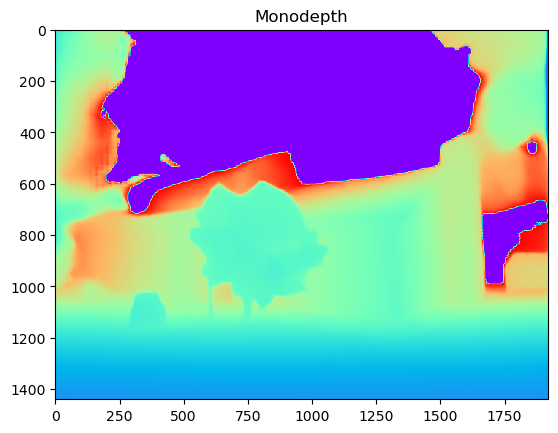

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(human_entry['gestalt'][0])
plt.title('Gestalt segmentation')

plt.figure()
depth = np.array(human_entry['depthcm'][0])/100.
depth[depth>20] = 0
depth = depth/depth.max()
plt.title('Monodepth')
plt.imshow(depth, cmap='rainbow')


Not enough vertices or connections in image 2


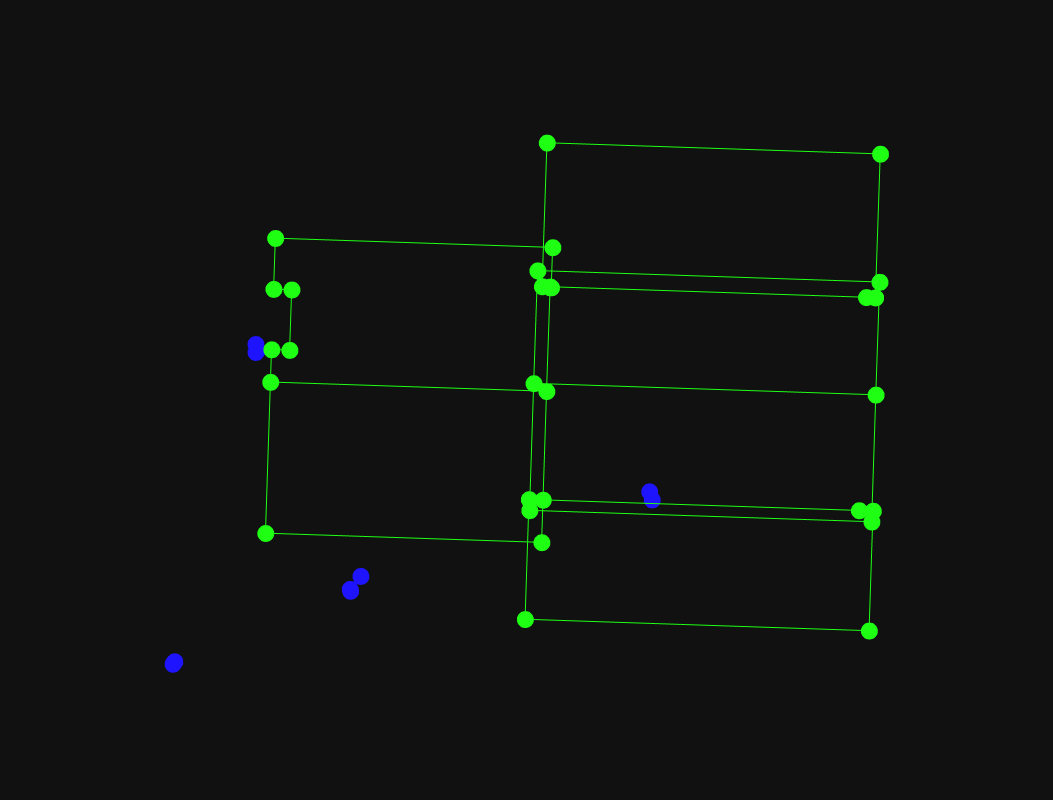

In [5]:
# Here is the prediction and visualization of single entry
key, vertices, edges = predict(entry, visualize=True)

In [6]:
from hoho import compute_WED

compute_WED(vertices,
            edges,
            np.array(entry['wf_vertices']),
            np.array(entry['wf_edges']),
            cv=1, ce=1)

1.6093560850517319

In [7]:
compute_WED(vertices,
            edges,
            np.array(entry['wf_vertices']),
            np.array(entry['wf_edges']),
            cv=438, ce=1)

166.98052955030022